### Matplotlib Labels

Text(0.5, 1.0, 'Kangaroo Jumps Today')

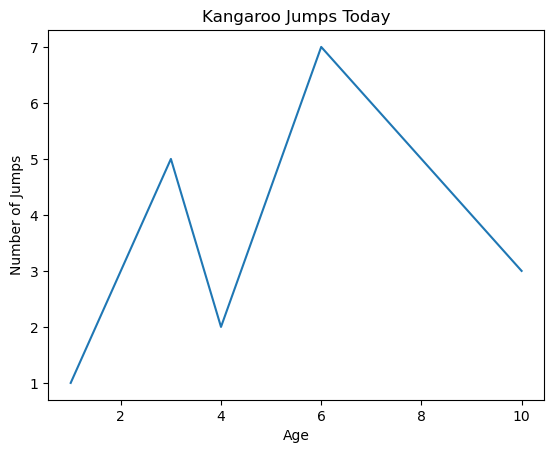

In [17]:
import matplotlib.pyplot as plt

plt.plot([1,3,4,6,10],[1,5,2,7,3])
plt.xlabel('Age')
plt.ylabel('Number of Jumps')
plt.title('Kangaroo Jumps Today')

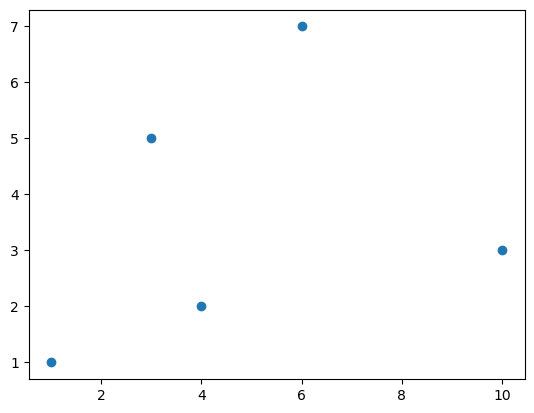

In [19]:
fig, ax = plt.subplots()
ax.scatter([1,3,4,6,10],[1,5,2,7,3])

Text(0.5, 1.0, 'Kangaroo Jumps Today')

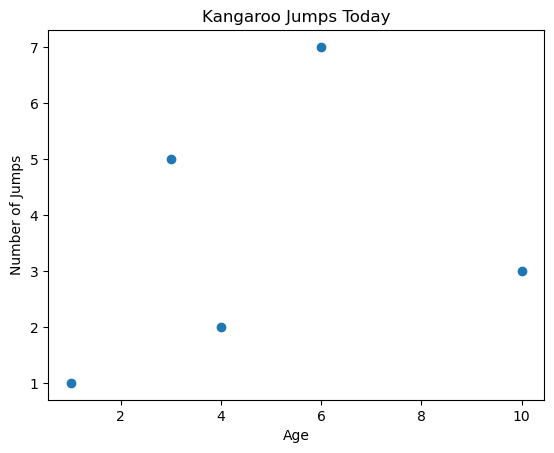

In [20]:
fig, ax = plt.subplots()
ax.scatter([1,3,4,6,10],[1,5,2,7,3])
ax.set_xlabel('Age')
ax.set_ylabel('Number of Jumps')
ax.set_title('Kangaroo Jumps Today')

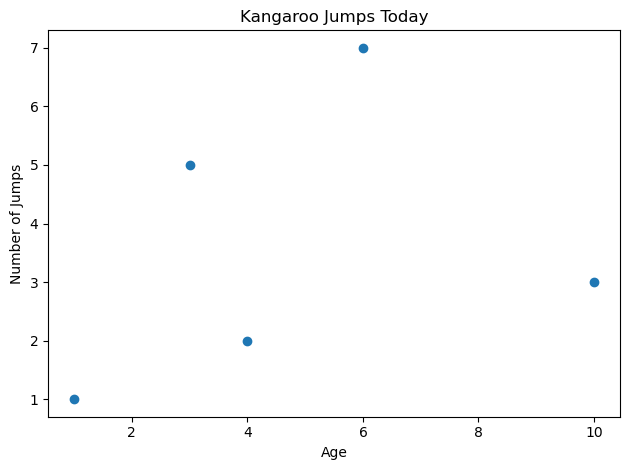

In [21]:
fig, ax = plt.subplots()
ax.scatter([1,3,4,6,10],[1,5,2,7,3])
ax.set_xlabel('Age')
ax.set_ylabel('Number of Jumps')
ax.set_title('Kangaroo Jumps Today')
fig.tight_layout()

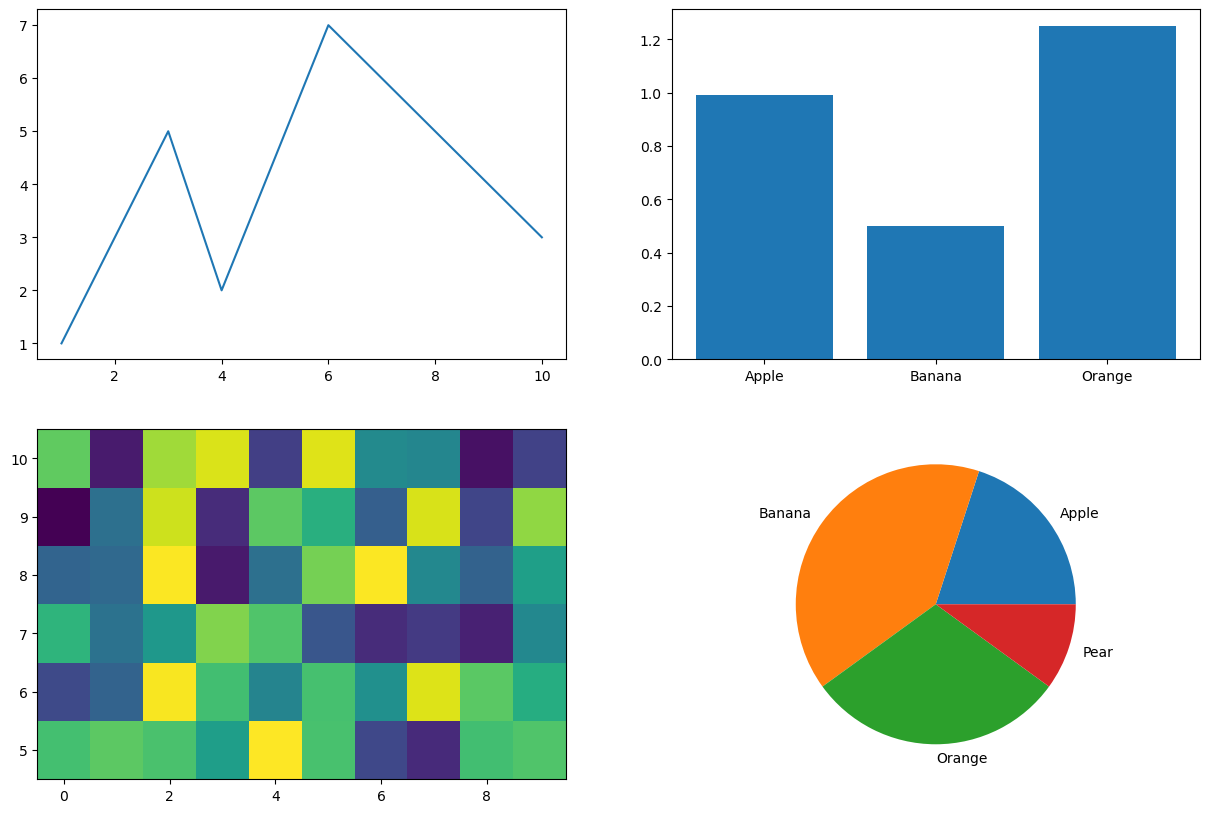

In [22]:
import numpy as np
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].plot([1,3,4,6,10],[1,5,2,7,3])
# ax[0,0].set_xlabel('Age')
ax[0,1].bar(['Apple','Banana','Orange'],[0.99,0.50,1.25])
ax[1,0].pcolormesh(x, y, Z)
ax[1,1].pie([20,40,30,10], labels=['Apple','Banana','Orange','Pear'])
# plt.xlabel("Age")
fig.savefig('vis.png')

# Plotting with pandas and polars

In [23]:
import pandas as pd
fruit = pd.DataFrame({'name': ['Apple','Banana','Orange','Pear'],
         'count': [20,40,30,10],
         'price': [0.99,0.50,1.25,1.25]})

name  count  price
0   Apple     20   0.99
1  Banana     40   0.50
2  Orange     30   1.25
3    Pear     10   1.25

<Axes: >

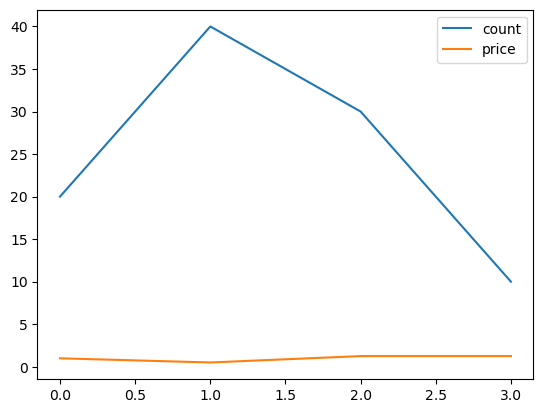

In [24]:
fruit.plot()

<Axes: xlabel='name'>

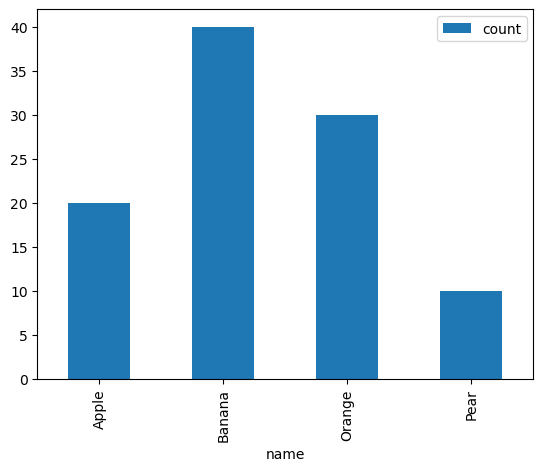

In [71]:
fruit.plot.bar(x='name',y='count')

<Axes: xlabel='name'>

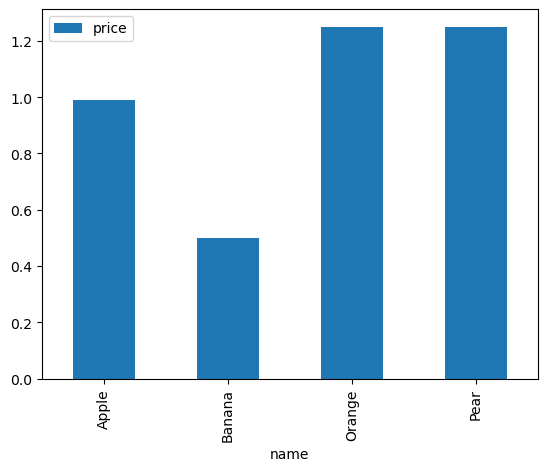

In [25]:
fruit.plot(kind='bar',x='name',y='price')

<BarContainer object of 4 artists>

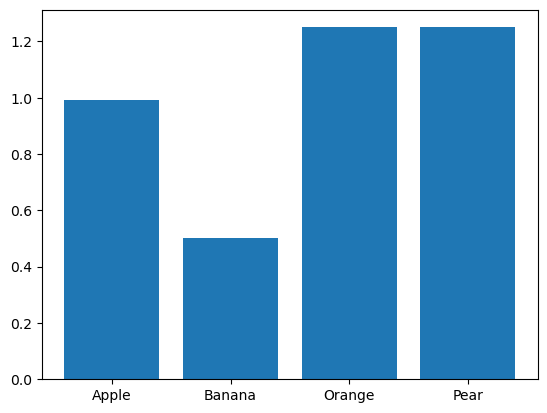

In [26]:
import matplotlib.pyplot as plt

plt.bar(x='name',height='price',data=fruit)

In [27]:
import polars as pl
fruit_pl = pl.DataFrame(fruit)

shape: (4, 3)
┌────────┬───────┬───────┐
│ name   ┆ count ┆ price │
│ ---    ┆ ---   ┆ ---   │
│ str    ┆ i64   ┆ f64   │
╞════════╪═══════╪═══════╡
│ Apple  ┆ 20    ┆ 0.99  │
│ Banana ┆ 40    ┆ 0.5   │
│ Orange ┆ 30    ┆ 1.25  │
│ Pear   ┆ 10    ┆ 1.25  │
└────────┴───────┴───────┘

In [28]:
fruit_pl.plot()

TypeError: 'DataFramePlot' object is not callable

<BarContainer object of 4 artists>

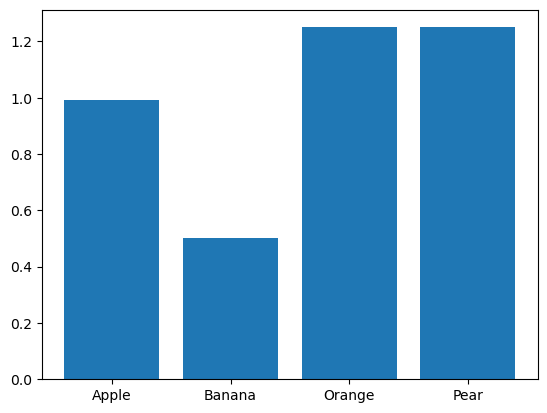

In [29]:
plt.bar(x='name',height='price',data=fruit_pl)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['Apple', 'Banana', 'Orange', 'Pear'], dtype=object)

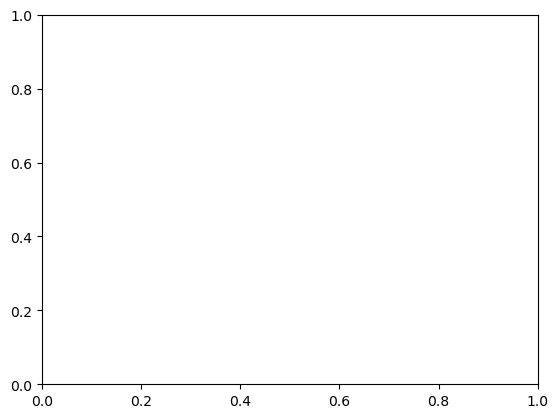

In [32]:
fruit.plot.scatter(x='price',y='count',c='name')

Text(0.5, 1.0, 'Fruit Prices')

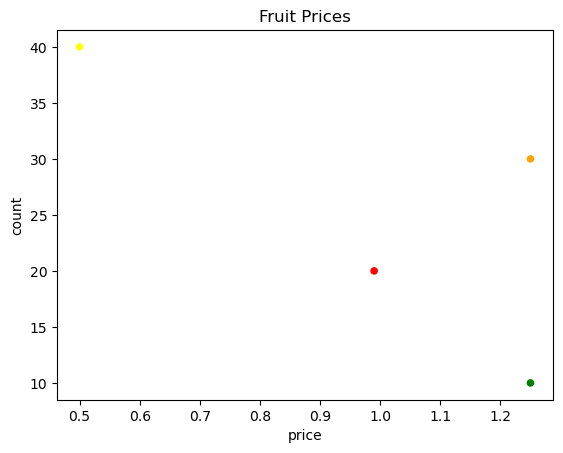

In [33]:
colors = {'Apple': 'red','Orange': 'orange','Banana': 'yellow','Pear': 'green'}
ax = fruit.plot.scatter(x='price',y='count', c=fruit['name'].map(colors))
ax.set_title('Fruit Prices')

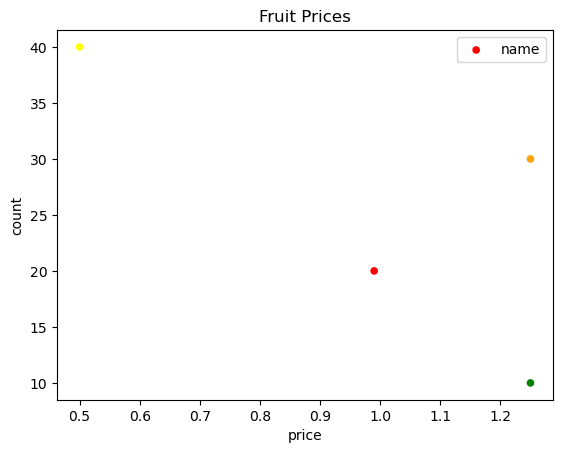

In [35]:
colors = {'Apple': 'red','Orange': 'orange','Banana': 'yellow','Pear': 'green'}
ax = fruit.plot.scatter(x='price',y='count', c=fruit['name'].map(colors), label='name')
ax.set_title('Fruit Prices')
plt.legend()

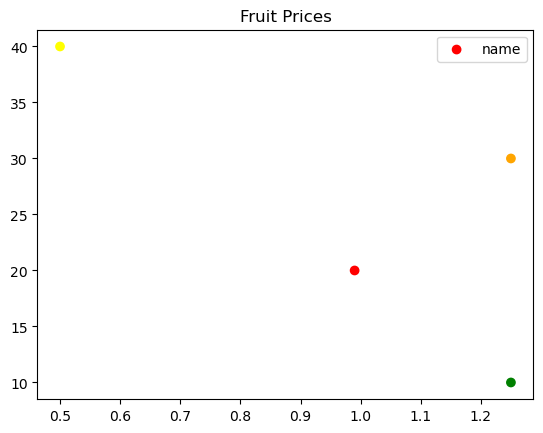

In [38]:
colors = {'Apple': 'red','Orange': 'orange','Banana': 'yellow','Pear': 'green'}
plt.scatter(x='price',y='count', c=fruit['name'].map(colors), label='name', data=fruit)
plt.title('Fruit Prices')
plt.legend()

<Axes: xlabel='price', ylabel='count'>

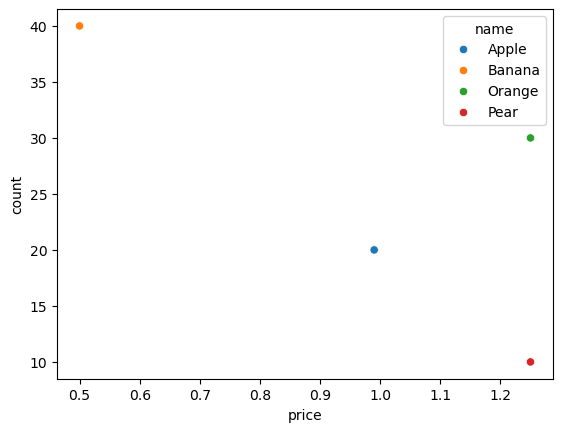

In [42]:
# may need to install seaborn
# %conda install -c conda-forge seaborn

import seaborn as sns
sns.scatterplot(x='price',y='count',hue='name', data=fruit)

# Altair

In [43]:
# may need to install altair
# %conda install -c conda-forge altair

import altair as alt
import pandas as pd

In [47]:
data = pd.DataFrame({
  'x': [1,3,4,6,10],
  'y': [1,5,2,7,3]
})

x  y
0   1  1
1   3  5
2   4  2
3   6  7
4  10  3

In [48]:
alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
)

alt.Chart(...)

### Attribute Types

In [49]:
data = pd.DataFrame({
    'age': [1,3,4,6,10],
    'weight': [20,50,25,55,125],
    'zoo_area': [1,3,3,1,2],
    'num_scoops': [3,2,4,2,3]
})

age  weight  zoo_area  num_scoops
0    1      20         1           3
1    3      50         3           2
2    4      25         3           4
3    6      55         1           2
4   10     125         2           3

In [50]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area' #:Q
)

alt.Chart(...)

In [51]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:O'
)

alt.Chart(...)

In [52]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N'
)

alt.Chart(...)

In [73]:
# Bubble Chart

data = pd.DataFrame({
    'age': [1,3,4,6,10, 11,7,5,9,9],
    'weight': [20,50,25,55,125, 20,50,25,55,125],
    'zoo_area': [1,3,3,1,2, 1,3,3,1,2],
    'num_scoops': [3,2,4,2,3,10,5,7,90,120]
})

alt.Chart(data).mark_point(filled=True, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N',
    size='num_scoops'
)

alt.Chart(...)

In [87]:
a = (pl.DataFrame(data).plot.point(x='age',y='weight',size='num_scoops',color='zoo_area:N')
                            .configure_point(filled=True, stroke='black',strokeWidth=1))

alt.Chart(...)

### Concatenation, Layering, and Repetition

In [55]:
c1 = alt.Chart(data).mark_point(filled=True, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N',
    size='num_scoops'
)

alt.Chart(...)

In [56]:
c2 = alt.Chart(data).mark_bar().encode(
    x='zoo_area:N',
    y='count()'
)

alt.Chart(...)

In [57]:
c1 | c2

alt.HConcatChart(...)

In [58]:
c1 & c2

alt.VConcatChart(...)

In [59]:
data = pd.DataFrame({
  'x': [1,3,4,6,10],
  'y': [1,5,2,7,3]
})

lines = alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
)

dots = alt.Chart(data).mark_point(size=150, shape='triangle', color='red',filled=True).encode(
    x='x',
    y='y'
)

lines

alt.Chart(...)

In [60]:
dots

alt.Chart(...)

In [61]:
lines + dots

alt.LayerChart(...)

In [65]:
penguins = 'https://raw.githubusercontent.com/vega/vega-datasets/master/data/penguins.json'

alt.Chart(penguins).mark_point().encode(
    x="Beak Length (mm):Q",
    y="Beak Depth (mm):Q", 
    color='Species:N'
)

alt.Chart(...)

In [66]:
penguins = 'https://raw.githubusercontent.com/vega/vega-datasets/master/data/penguins.json'

alt.Chart(penguins).mark_point().encode(
    alt.X("Beak Length (mm):Q", scale=alt.Scale(zero=False)),
    alt.Y("Beak Depth (mm):Q", scale=alt.Scale(zero=False)),
    color='Species:N'
)

alt.Chart(...)

In [67]:
alt.Chart(penguins).mark_point().encode(
    alt.X("Beak Length (mm):Q", scale=alt.Scale(zero=False)),
    alt.Y("Beak Depth (mm):Q", scale=alt.Scale(zero=False)),
    color='Species:N'
).interactive()

alt.Chart(...)

In [68]:
penguins = 'https://raw.githubusercontent.com/vega/vega-datasets/master/data/penguins.json'

alt.Chart(penguins).mark_point().encode(
    alt.X(alt.repeat("row"), type='quantitative', scale=alt.Scale(zero=False)),
    alt.Y(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
    color='Species:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)'],
    column=['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)']
)

alt.RepeatChart(...)

In [ ]:
# %conda install -c conda-forge vega_datasets

In [69]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
source = data.income.url

alt.Chart(source).mark_geoshape().encode(
    shape='geo:G',
    color='pct:Q',
    tooltip=['name:N', 'pct:Q'],
    facet=alt.Facet('group:N', columns=2),
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data=states, key='id'),
    as_='geo'
).properties(
    width=300,
    height=175,
).project(
    type='albersUsa'
)

alt.Chart(...)